In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True, orient='columns')
#checkin = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)
#review_data = pd.read_json('yelp_academic_dataset_review.json', lines=True)
#tip = pd.read_json('yelp_academic_dataset_tip.json', lines=True)
#user = pd.read_json('yelp_academic_dataset_user.json', lines=True)

Wall time: 3.59 s


In [3]:
business_data.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [4]:
business_data.shape

(209393, 14)

In [5]:
business_data['categories'].unique

<bound method Series.unique of 0         Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1         Health & Medical, Fitness & Instruction, Yoga,...
2                          Pets, Pet Services, Pet Groomers
3         Hardware Stores, Home Services, Building Suppl...
4         Home Services, Plumbing, Electricians, Handyma...
                                ...                        
209388                    Japanese, Sushi Bars, Restaurants
209389    Department Stores, Food, Mobile Phones, Fashio...
209390    American (New), Food, Burgers, Restaurants, Fa...
209391                     Pet Services, Pet Training, Pets
209392    Tax Services, Professional Services, Accountan...
Name: categories, Length: 209393, dtype: object>

In [6]:
%%time
restaurants_data = business_data[business_data['categories'].str.contains('Restaurant.*')==True].reset_index()
restaurants_data

Wall time: 187 ms


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
2,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",None
4,30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63956,209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"{'NoiseLevel': 'u'average'', 'BikeParking': 'T...","Nightlife, Diners, Bars, Southern, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
63957,209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Restaurants, Sandwiches, Food, Breakfast & Bru...","{'Monday': '5:30-15:0', 'Tuesday': '5:30-15:0'..."
63958,209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
63959,209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [7]:
%%time
restaurants_data.to_csv('restaurantsonly.csv')

Wall time: 1.81 s


In [8]:
restuarant_locs = pd.DataFrame(restaurants_data['city'].value_counts())
restuarant_locs

,city
Toronto,8681
Las Vegas,6937
Phoenix,4221
Montréal,4097
Calgary,3117
...,...
Lancaster,1
Duvernay,1
Crescent,1
RŽpentigny,1


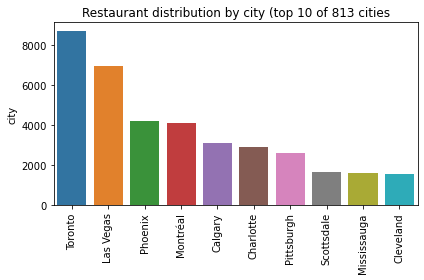

In [9]:
#restaurants_data['city'].value_counts()[:20].plot(kind='barh',colormap='viridis')
sns.barplot(restuarant_locs.index[:10],restuarant_locs.city[:10])
plt.xticks(rotation=90)
plt.title('Restaurant distribution by city (top 10 of 813 cities')
plt.tight_layout()

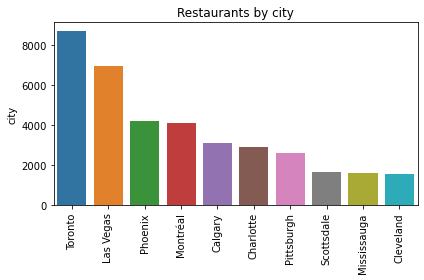

In [10]:
sns.barplot(restuarant_locs.index[:10],restuarant_locs.city[:10])
plt.xticks(rotation=90)
plt.title('Restaurants by city')
plt.tight_layout()

In [11]:
restaurants_tr = restaurants_data[restaurants_data['city'] == 'Toronto'].reset_index()
#restaurants_tr

In [12]:
restaurants_lv = restaurants_data[restaurants_data['city'] == 'Las Vegas'].reset_index()
#restaurants_lv

In [13]:
restaurants_ph = restaurants_data[restaurants_data['city'] == 'Phoenix'].reset_index()
#restaurants_ph

In [14]:
%%time
restaurants_tr.to_csv('restaurants_tr.csv',index=False)
restaurants_lv.to_csv('restaurants_lv.csv',index=False)
restaurants_ph.to_csv('restaurants_ph.csv',index=False)

Wall time: 599 ms


In [15]:
tr_restaurants_list = list(restaurants_tr['business_id'])
lv_restaurants_list = list(restaurants_lv['business_id'])
ph_restaurants_list = list(restaurants_ph['business_id'])
#tr_restaurants_list

In [16]:
type(tr_restaurants_list)

list

In [17]:
%%time
reviews = pd.read_csv('starsonly.csv')
reviews

Wall time: 9.04 s


,review_id,user_id,business_id,stars
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4
...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1
8021118,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3
8021119,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5
8021120,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3


In [18]:
%%time
reviews_restuarantsonly = reviews[reviews.business_id.isin(restaurants_data['business_id'])]
reviews_restuarantsonly.shape

Wall time: 1.56 s


(5056227, 4)

In [19]:
%%time
reviews_tr = reviews[reviews.business_id.isin(tr_restaurants_list)]
reviews_tr.shape

Wall time: 940 ms


(432492, 4)

In [20]:
%%time
reviews_lv = reviews[reviews.business_id.isin(lv_restaurants_list)]
reviews_lv.shape

Wall time: 682 ms


(1503943, 4)

In [21]:
%%time
reviews_ph = reviews[reviews.business_id.isin(ph_restaurants_list)]
reviews_ph.shape

Wall time: 608 ms


(511055, 4)

In [22]:
%%time
reviews_tr.to_csv('reviews_tr.csv',index=False)
reviews_lv.to_csv('reviews_lv.csv',index=False)
reviews_ph.to_csv('reviews_ph.csv',index=False)
reviews_restuarantsonly.to_csv('reviews_restuarantsonly.csv',index=False)

Wall time: 18.2 s


In [23]:
testread = pd.read_csv('reviews_lv.csv')
testread

,review_id,user_id,business_id,stars
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1
1,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1
2,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5
3,XvLG7ReC8JZmBltOLJzfcA,-Co-ReNx_lXT1xL_Rr0B2g,XZbuPXdyA0ZtTu3AzqtQhg,4
4,WGbtqQMeJwTVg6DFb156EQ,K5MSNpwRf0xKQSaC6gK9Cw,PL3cimEUfNHlenOGSOAdJg,4
...,...,...,...,...
1503938,bifI5vnJ_LT0eAMD_O3cbw,1z0yKHr5KBlfJqm6O11V4g,9fUCrtgpHsC14bp8-uhfmQ,5
1503939,T34JvlaKD1qcQARVOOHm4w,7puz3FPymI83yvk1_J7ilQ,AUOlDSQ8R2wIkN4lQ4kVDg,1
1503940,SkiPC10TBymnU-y8ScdQ_w,23cjtl3AWJtxKL3O78-Djw,e6ls6aHFa75xKEZUQUu1QQ,4
1503941,cPX3OKqbv3-9ZYZTp_UKyA,bH3Uc0YNlnKubj8cT4nQ0w,H8qpFitIesth86zqR4cwYg,5
